# MCO1 

// Project Details Details

### GARYNATION (S13)
1. Bien Aaron Miranda
2. Luis Miguel Rana
3. Karl Andre Aquino
4. Dominic Luis Baccay

### Python Libraries

Import numpy and pandas.

pandas is a software library for Python which provides data structures and data analysis tools.

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## The Dataset

    /////Give details about the dataset, what is inside the dataset, the variables, etc.
    
    A collection of YouTube giants, this dataset offers a perfect avenue to analyze and gain valuable insights from the luminaries of the platform. With comprehensive details on top creators' subscriber counts, video views, upload frequency, country of origin, earnings, and more, this treasure trove of information is a must-explore for aspiring content creators, data enthusiasts, and anyone intrigued by the ever-evolving online content landscape.

In [324]:
#encoding came from the discussion so that it is readable
youtube_df = pd.read_csv("Global YouTube Statistics.csv", encoding='iso-8859-1')

If you view the `.csv` file in Excel, you can see that our dataset contains about 995 **observations** (rows) across 28 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`rank`**: Position of the YouTube channel based on the number of subscribers
- **`Youtuber`**: Name of the YouTube channel
- **`subscribers`**: Number of subscribers to the channel
- **`video views`**: Overall count views to the channel
- **`category`**: Category or niche of the channel
- **`Title`**: Title
- **`uploads`**: Total number of videos uploaded on the channel
- **`Country`**: Country where the YouTube channel originates
- **`Abbreviation`**: Abbreviation of the country
- **`channel_type`**: Type of the YouTube channel (e.g., individual, brand)
- **`video_views_rank`**: Ranking of the channel based on total video views
- **`country_rank`**: Ranking of the channel based on the number of subscribers within its country
- **`channel_type_rank`**: Ranking of the channel based on its type (individual or brand)
- **`video_views_for_the_last_30_days`**: Total video views in the last 30 days
- **`lowest_monthly_earnings`**: Lowest estimated monthly earnings from the channel \$
- **`highest_monthly_earnings`**: Highest estimated monthly earnings from the channel \$
- **`lowest_yearly_earnings`**: Lowest estimated yearly earnings from the channel \$
- **`highest_yearly_earnings`**: Highest estimated yearly earnings from the channel $
- **`subscribers_for_last_30_days`**: Number of new subscribers gained in the last 30 days
- **`created_year`**: Year when the YouTube channel was created
- **`created_month`**: Month when the YouTube channel was created
- **`created_date`**: Exact date of the YouTube channel's creation
- **`Gross tertiary education enrollment (\%)`**: Percentage of the population enrolled in tertiary education in the country %
- **`Population`**: Total population of the country
- **`Unemployment rate`**: Unemployment rate in the country %
- **`Urban_population`**: Percentage of the population living in urban areas %
- **`Latitude`**: Latitude coordinate of the country's location
- **`Longitude`**: Longitude coordinate of the country's location

## Reading the Dataset

Our first step is to load the dataset using pandas. This will load the dataset into a pandas DataFrame. To load the dataset, we use the read_csv function. Note that you may need to change the path depending on the location of the file in your machine.

Will also tackle about what can be seen in the Dataset as a DataFrame

In [325]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### Examining the observations within the Dataset

    
To gain a better understanding of the observations within the dataset, it's essential to examine their appearance or visual representation. This can provide valuable insights and help you make informed decisions based on the data.

In [326]:
youtube_df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


# Cleaning the Dataset

This process aims to enhance the quality and reliability of the dataset.

### Before Cleaning:
Number of Observations: 995<br>
Number of Columns: 28<br>
Data types: float64(18), int64(3), object(7)<br>

#### Initial Observations: 
- There are special characters in the 'Youtuber' column.
- There are missing/null values in the dataset.
- Some variables are similar, therefore, unnecessary.
- Some data types are inappropriate for their respective variables.


### The "Youtuber" variable

     We want to check out if there are any observations that has no youtube names, because there are no youtube name present, we will be excluding these observations from the list.
     

In [327]:
# check for null values
nullyoutuber_df = youtube_df[youtube_df["Youtuber"].isnull()]
nullyoutuber_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [328]:
# check for duplicates
column_name = "Youtuber"
unique_count = youtube_df[column_name].nunique()
print(f"Number of unique values in '{column_name}': {unique_count}")

Number of unique values in 'Youtuber': 995


In [329]:
# declare the variables that will be used
columns_to_keep = ['Youtuber', 'subscribers', 'video views', 'created_year', 'category', 'channel_type', 'uploads', 'Country', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'Population']

# drop unused columns (variables)
youtube_df = youtube_df[columns_to_keep]

# drop the rows where video views == 0
youtube_df = youtube_df[youtube_df["video views"] != 0]

# drop the rows where uploads == 0
youtube_df = youtube_df[youtube_df["uploads"] != 0]

youtube_df

,Youtuber,subscribers,video views,created_year,category,channel_type,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,Population
0,T-Series,245000000,2.280000e+11,2006.0,Music,Music,20082,India,564600.0,9000000.0,1.366418e+09
2,MrBeast,166000000,2.836884e+10,2012.0,Entertainment,Entertainment,741,United States,337000.0,5400000.0,3.282395e+08
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,2006.0,Education,Education,966,United States,493800.0,7900000.0,3.282395e+08
4,SET India,159000000,1.480000e+11,2006.0,Shows,Entertainment,116536,India,455900.0,7300000.0,1.366418e+09
6,ýýý Kids Diana Show,112000000,9.324704e+10,2015.0,People & Blogs,Entertainment,1111,United States,182900.0,2900000.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,9.029610e+09,2017.0,Sports,Entertainment,1200,Brazil,138100.0,2200000.0,2.125594e+08
991,Free Fire India Official,12300000,1.674410e+09,2018.0,People & Blogs,Games,1500,India,16200.0,258900.0,1.366418e+09
992,Panda,12300000,2.214684e+09,2006.0,NaN,Games,2452,United Kingdom,17.0,268.0,6.683440e+07
993,RobTopGames,12300000,3.741235e+08,2012.0,Gaming,Games,39,Sweden,968.0,15500.0,1.028545e+07


In [330]:
# Displaying the 'category' and 'channel_type' values for cleaning
column1 = 'category'
column2 = 'channel_type'
unique_values_column1 = youtube_df[column1].unique().tolist()
unique_values_column2 = youtube_df[column2].unique().tolist()

df_unique_values_column1 = pd.DataFrame(unique_values_column1, columns=[column1])
df_unique_values_column2 = pd.DataFrame(unique_values_column2, columns=[column2])

# Concatenate DataFrames horizontally
result_df = pd.concat([df_unique_values_column1, df_unique_values_column2], axis=1)

# Display the unique values side by side as DataFrames
result_df


,category,channel_type
0,Music,Music
1,Entertainment,Entertainment
2,Education,Education
3,Shows,People
4,People & Blogs,Sports
5,Gaming,Film
6,Sports,News
7,Film & Animation,NaN
8,Howto & Style,Games
9,News & Politics,Comedy


In [331]:
# check for null values in category and replace with closest value in channel_type
nullcategory_df = youtube_df[youtube_df["category"].isnull()]
nullcategory_df

,Youtuber,subscribers,video views,created_year,category,channel_type,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,Population
91,Vlad vï¿½ï¿½ï,37900000,2.351015e+10,2018.0,NaN,Entertainment,515,United States,61000.00,976400.0,3.282395e+08
132,BETER Bï¿½ï¿½,32700000,1.918004e+10,2012.0,NaN,Games,2738,Turkey,365900.00,5900000.0,8.342962e+07
155,Diana and Roma ESP,30700000,1.235599e+10,2016.0,NaN,Entertainment,578,United States,25700.00,412000.0,3.282395e+08
161,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,30400000,1.799996e+10,2018.0,NaN,Entertainment,532,United States,30700.00,491700.0,3.282395e+08
214,D Billions,26200000,3.197746e+10,2019.0,NaN,Entertainment,775,United States,121800.00,1900000.0,3.282395e+08
255,shfa show India,24200000,1.572416e+10,2019.0,NaN,People,469,United Arab Emirates,37800.00,604800.0,9.770529e+06
256,Super JoJo - Nursery Rhymes & Kids Songs,24100000,3.297749e+08,2019.0,NaN,Education,36,United States,82100.00,1300000.0,3.282395e+08
261,Diana and Roma ARA,24100000,1.104126e+10,2019.0,NaN,Entertainment,590,United States,16700.00,267500.0,3.282395e+08
312,Vlad and Niki Arabic,22500000,1.061370e+10,2018.0,NaN,Entertainment,526,United States,16300.00,260300.0,3.282395e+08
319,Vlad and Niki ESP,22000000,8.594441e+09,2018.0,NaN,Entertainment,515,United States,46000.00,735500.0,3.282395e+08


In [332]:
# Use the .loc method to set the new value based on the condition (where 'category' is null)
youtube_df.loc[(youtube_df['channel_type'] == 'Games') & (youtube_df['category'].isnull()), 'category'] = 'Gaming'
youtube_df.loc[(youtube_df['channel_type'] == 'People') & (youtube_df['category'].isnull()), 'category'] = 'People & Blogs'
youtube_df.loc[(youtube_df['channel_type'] == 'Entertainment') & (youtube_df['category'].isnull()), 'category'] = 'Entertainment'
youtube_df.loc[(youtube_df['channel_type'] == 'Sports') & (youtube_df['category'].isnull()), 'category'] = 'Sports'
youtube_df.loc[(youtube_df['channel_type'] == 'Film') & (youtube_df['category'].isnull()), 'category'] = 'Film & Animation'
youtube_df.loc[(youtube_df['channel_type'] == 'Howto') & (youtube_df['category'].isnull()), 'category'] = 'Howto & Style'
youtube_df.loc[(youtube_df['channel_type'] == 'Education') & (youtube_df['category'].isnull()), 'category'] = 'Education'
youtube_df.loc[(youtube_df['channel_type'] == 'Tech') & (youtube_df['category'].isnull()), 'category'] = 'Science & Technology'
youtube_df.loc[(youtube_df['channel_type'] == 'Music') & (youtube_df['category'].isnull()), 'category'] = 'Music'

# Remove the 'channel_type' variable since it will no longer be used


# Display the modified DataFrame
youtube_df

,Youtuber,subscribers,video views,created_year,category,channel_type,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,Population
0,T-Series,245000000,2.280000e+11,2006.0,Music,Music,20082,India,564600.0,9000000.0,1.366418e+09
2,MrBeast,166000000,2.836884e+10,2012.0,Entertainment,Entertainment,741,United States,337000.0,5400000.0,3.282395e+08
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,2006.0,Education,Education,966,United States,493800.0,7900000.0,3.282395e+08
4,SET India,159000000,1.480000e+11,2006.0,Shows,Entertainment,116536,India,455900.0,7300000.0,1.366418e+09
6,ýýý Kids Diana Show,112000000,9.324704e+10,2015.0,People & Blogs,Entertainment,1111,United States,182900.0,2900000.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,9.029610e+09,2017.0,Sports,Entertainment,1200,Brazil,138100.0,2200000.0,2.125594e+08
991,Free Fire India Official,12300000,1.674410e+09,2018.0,People & Blogs,Games,1500,India,16200.0,258900.0,1.366418e+09
992,Panda,12300000,2.214684e+09,2006.0,Gaming,Games,2452,United Kingdom,17.0,268.0,6.683440e+07
993,RobTopGames,12300000,3.741235e+08,2012.0,Gaming,Games,39,Sweden,968.0,15500.0,1.028545e+07


In [333]:
# remove channel_type as it is similar to category
youtube_df = youtube_df.drop(columns='channel_type')
youtube_df

,Youtuber,subscribers,video views,created_year,category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,Population
0,T-Series,245000000,2.280000e+11,2006.0,Music,20082,India,564600.0,9000000.0,1.366418e+09
2,MrBeast,166000000,2.836884e+10,2012.0,Entertainment,741,United States,337000.0,5400000.0,3.282395e+08
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,2006.0,Education,966,United States,493800.0,7900000.0,3.282395e+08
4,SET India,159000000,1.480000e+11,2006.0,Shows,116536,India,455900.0,7300000.0,1.366418e+09
6,ýýý Kids Diana Show,112000000,9.324704e+10,2015.0,People & Blogs,1111,United States,182900.0,2900000.0,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12300000,9.029610e+09,2017.0,Sports,1200,Brazil,138100.0,2200000.0,2.125594e+08
991,Free Fire India Official,12300000,1.674410e+09,2018.0,People & Blogs,1500,India,16200.0,258900.0,1.366418e+09
992,Panda,12300000,2.214684e+09,2006.0,Gaming,2452,United Kingdom,17.0,268.0,6.683440e+07
993,RobTopGames,12300000,3.741235e+08,2012.0,Gaming,39,Sweden,968.0,15500.0,1.028545e+07


In [334]:
# Names of the columns that will be modified
columns_to_modify = ['subscribers', 'video views', 'Population']

# Define a function to convert values to millions and change data type to int
def convert_to_millions_and_int(value):
    return (float(value) / 1e6) if pd.notna(value) else value

# Apply the conversion function to the specified columns
for column in columns_to_modify:
    youtube_df[column] = youtube_df[column].apply(convert_to_millions_and_int)

# Rename columns to indicate values are in millions
youtube_df.rename(columns={'subscribers': 'subscribers (in millions)', 'video views': 'video views (in millions)', 'Population': 'Population (in millions)'}, inplace=True)

youtube_df

,Youtuber,subscribers (in millions),video views (in millions),created_year,category,uploads,Country,lowest_monthly_earnings,highest_monthly_earnings,Population (in millions)
0,T-Series,245.0,228000.000000,2006.0,Music,20082,India,564600.0,9000000.0,1366.417754
2,MrBeast,166.0,28368.841870,2012.0,Entertainment,741,United States,337000.0,5400000.0,328.239523
3,Cocomelon - Nursery Rhymes,162.0,164000.000000,2006.0,Education,966,United States,493800.0,7900000.0,328.239523
4,SET India,159.0,148000.000000,2006.0,Shows,116536,India,455900.0,7300000.0,1366.417754
6,ýýý Kids Diana Show,112.0,93247.040539,2015.0,People & Blogs,1111,United States,182900.0,2900000.0,328.239523
...,...,...,...,...,...,...,...,...,...,...
990,Natan por Aï¿,12.3,9029.609749,2017.0,Sports,1200,Brazil,138100.0,2200000.0,212.559417
991,Free Fire India Official,12.3,1674.409945,2018.0,People & Blogs,1500,India,16200.0,258900.0,1366.417754
992,Panda,12.3,2214.684303,2006.0,Gaming,2452,United Kingdom,17.0,268.0,66.834405
993,RobTopGames,12.3,374.123483,2012.0,Gaming,39,Sweden,968.0,15500.0,10.285453


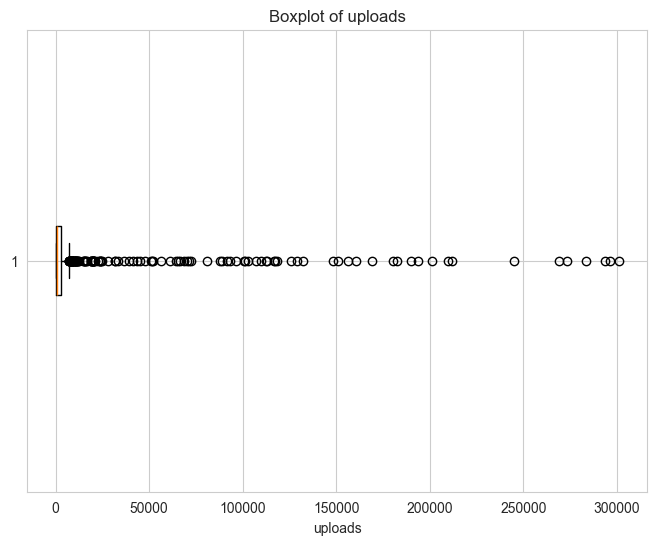

In [335]:
column_name = 'uploads'
# Create a boxplot for the values in the specified column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.boxplot(youtube_df[column_name], vert=False)  # Use 'vert=False' to create a horizontal boxplot
plt.title(f'Boxplot of {column_name}')
plt.xlabel(column_name)
plt.show()

### The "category" variable

     We want to check out 
     

In [336]:
# insert code here
youtube_df['category'].unique()

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', nan, 'Travel & Events'], dtype=object)

In [337]:
null_values = youtube_df[youtube_df["channel_type"].isnull()]
null_values

KeyError: 'channel_type'

### The "Monthly Earnings" variable

     We want to check out 
     

In [ ]:
# insert code here

### The "Highest Monthly Earnings" variable
 We want to check out 
 

In [ ]:
# insert code here

### The "Subscribers" variable

In [ ]:
# insert code here

### The "video views" variable



In [ ]:
# insert code here

### The "uploads" variable
 We want to check out 
 

In [ ]:
# insert code here

# Exploratory Data Analysis

    Placeholder detailsl

### What are the Highest Earning Categories?

    LMAO Try ko lang
    

In [ ]:
# insert Code Here

### Are there any correlation between views and monthly earnings?

    Placeholder details


### Are there any top Youtube channels with a lot of subscribers but has no video uploads?

    To find bot channels in the dataset
    

### Are there any top Youtube Channels with less than 2 videos and only a little bit of views and uploads?
    
    To extend the exploration on finding bots channel in the dataset_____
    

### Are there any correlations between views and subscribers?

 Placeholder details